In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
#!wget https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv

In [ ]:
#!wget https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv

In [3]:
df_cab_data = pd.read_csv('/content/cab_rides.csv')
df_weather_data = pd.read_csv('/content/weather.csv')

In [ ]:
df_cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544953e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543284e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543367e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543554e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543463e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [48]:
df_cab_data.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
147302,1.21,Uber,1543776781531,North End,Financial District,NaN,1.0,a46e59bd-1927-4b8c-ba39-20214e9c72b9,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,1970-01-01 00:25:43.776781531
147303,1.21,Uber,1543776781531,North End,Financial District,15.0,1.0,c0d0e60f-201f-462c-9edb-7fef91d11fcf,6c84fd89-3f11-4782-9b50-97c468b19529,Black,1970-01-01 00:25:43.776781531
147304,1.21,Uber,1543776781531,North End,Financial District,7.0,1.0,f43a4ff5-0ed8-4d56-83c8-0f9ea3d748c6,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,1970-01-01 00:25:43.776781531
147305,1.21,Uber,1543731776047,North End,Financial District,10.5,1.0,f51c9827-60db-439f-9a39-5a97d3a086c8,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1970-01-01 00:25:43.731776047
147306,2.45,Uber,1543731776047,Theatre District,Boston University,10.5,1.0,6021cfcf-3354-40a8-9b4c-8a4e9bfe6407,55c,NaN,1970-01-01 00:25:43.731776047


In [4]:
df_weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [5]:
import datetime
df_cab_data['datetime'] = pd.to_datetime(df_cab_data['time_stamp'])
df_weather_data['datetime'] = pd.to_datetime(df_weather_data['time_stamp'])
df_cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223


In [6]:
df_cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime'],
      dtype='object')

In [7]:
df_weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'datetime'],
      dtype='object')

In [8]:
df_cab_data.shape

(147307, 11)

In [9]:
df_weather_data.shape

(6276, 9)

In [10]:
df_cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,147307.000000,1.473070e+05,135610.000000,147307.000000
mean,2.203290,1.544037e+12,16.602416,1.014595
std,1.150124,6.877775e+08,9.374487,0.093576
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.300000,1.543442e+12,9.000000,1.000000
50%,2.170000,1.543730e+12,13.500000,1.000000
75%,2.950000,1.544820e+12,22.500000,1.000000
max,7.500000,1.545161e+12,92.000000,3.000000


In [11]:
df_weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [12]:
a = pd.concat([df_cab_data,df_weather_data])

In [ ]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')

In [15]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [16]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,1,0
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,1,0
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,1,0
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,1,0
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.69,West End,0.89,1000.70,NaN,0.96,1.52,1,0


In [13]:
a['day'] = a.datetime.dt.day
a['hour'] = a.datetime.dt.hour

In [14]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [49]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.72,North Station,0.89,1000.69,0.0,0.96,1.52,1,0
6272,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.85,Northeastern University,0.88,1000.71,0.0,0.96,1.54,1,0
6273,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.82,South Station,0.89,1000.70,0.0,0.96,1.54,1,0
6274,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.78,Theatre District,0.89,1000.70,0.0,0.96,1.54,1,0
6275,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.69,West End,0.89,1000.70,0.0,0.96,1.52,1,0


In [50]:
a.fillna(0,inplace=True)

In [18]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0


In [21]:
a.cab_type.value_counts()

Uber    81948
Lyft    65359
0        6276
Name: cab_type, dtype: int64

<Axes: xlabel='cab_type'>

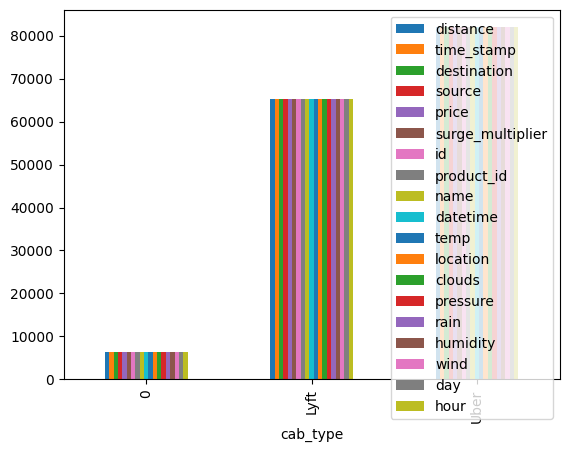

In [22]:
a.groupby('cab_type').count().plot.bar()

<Axes: >

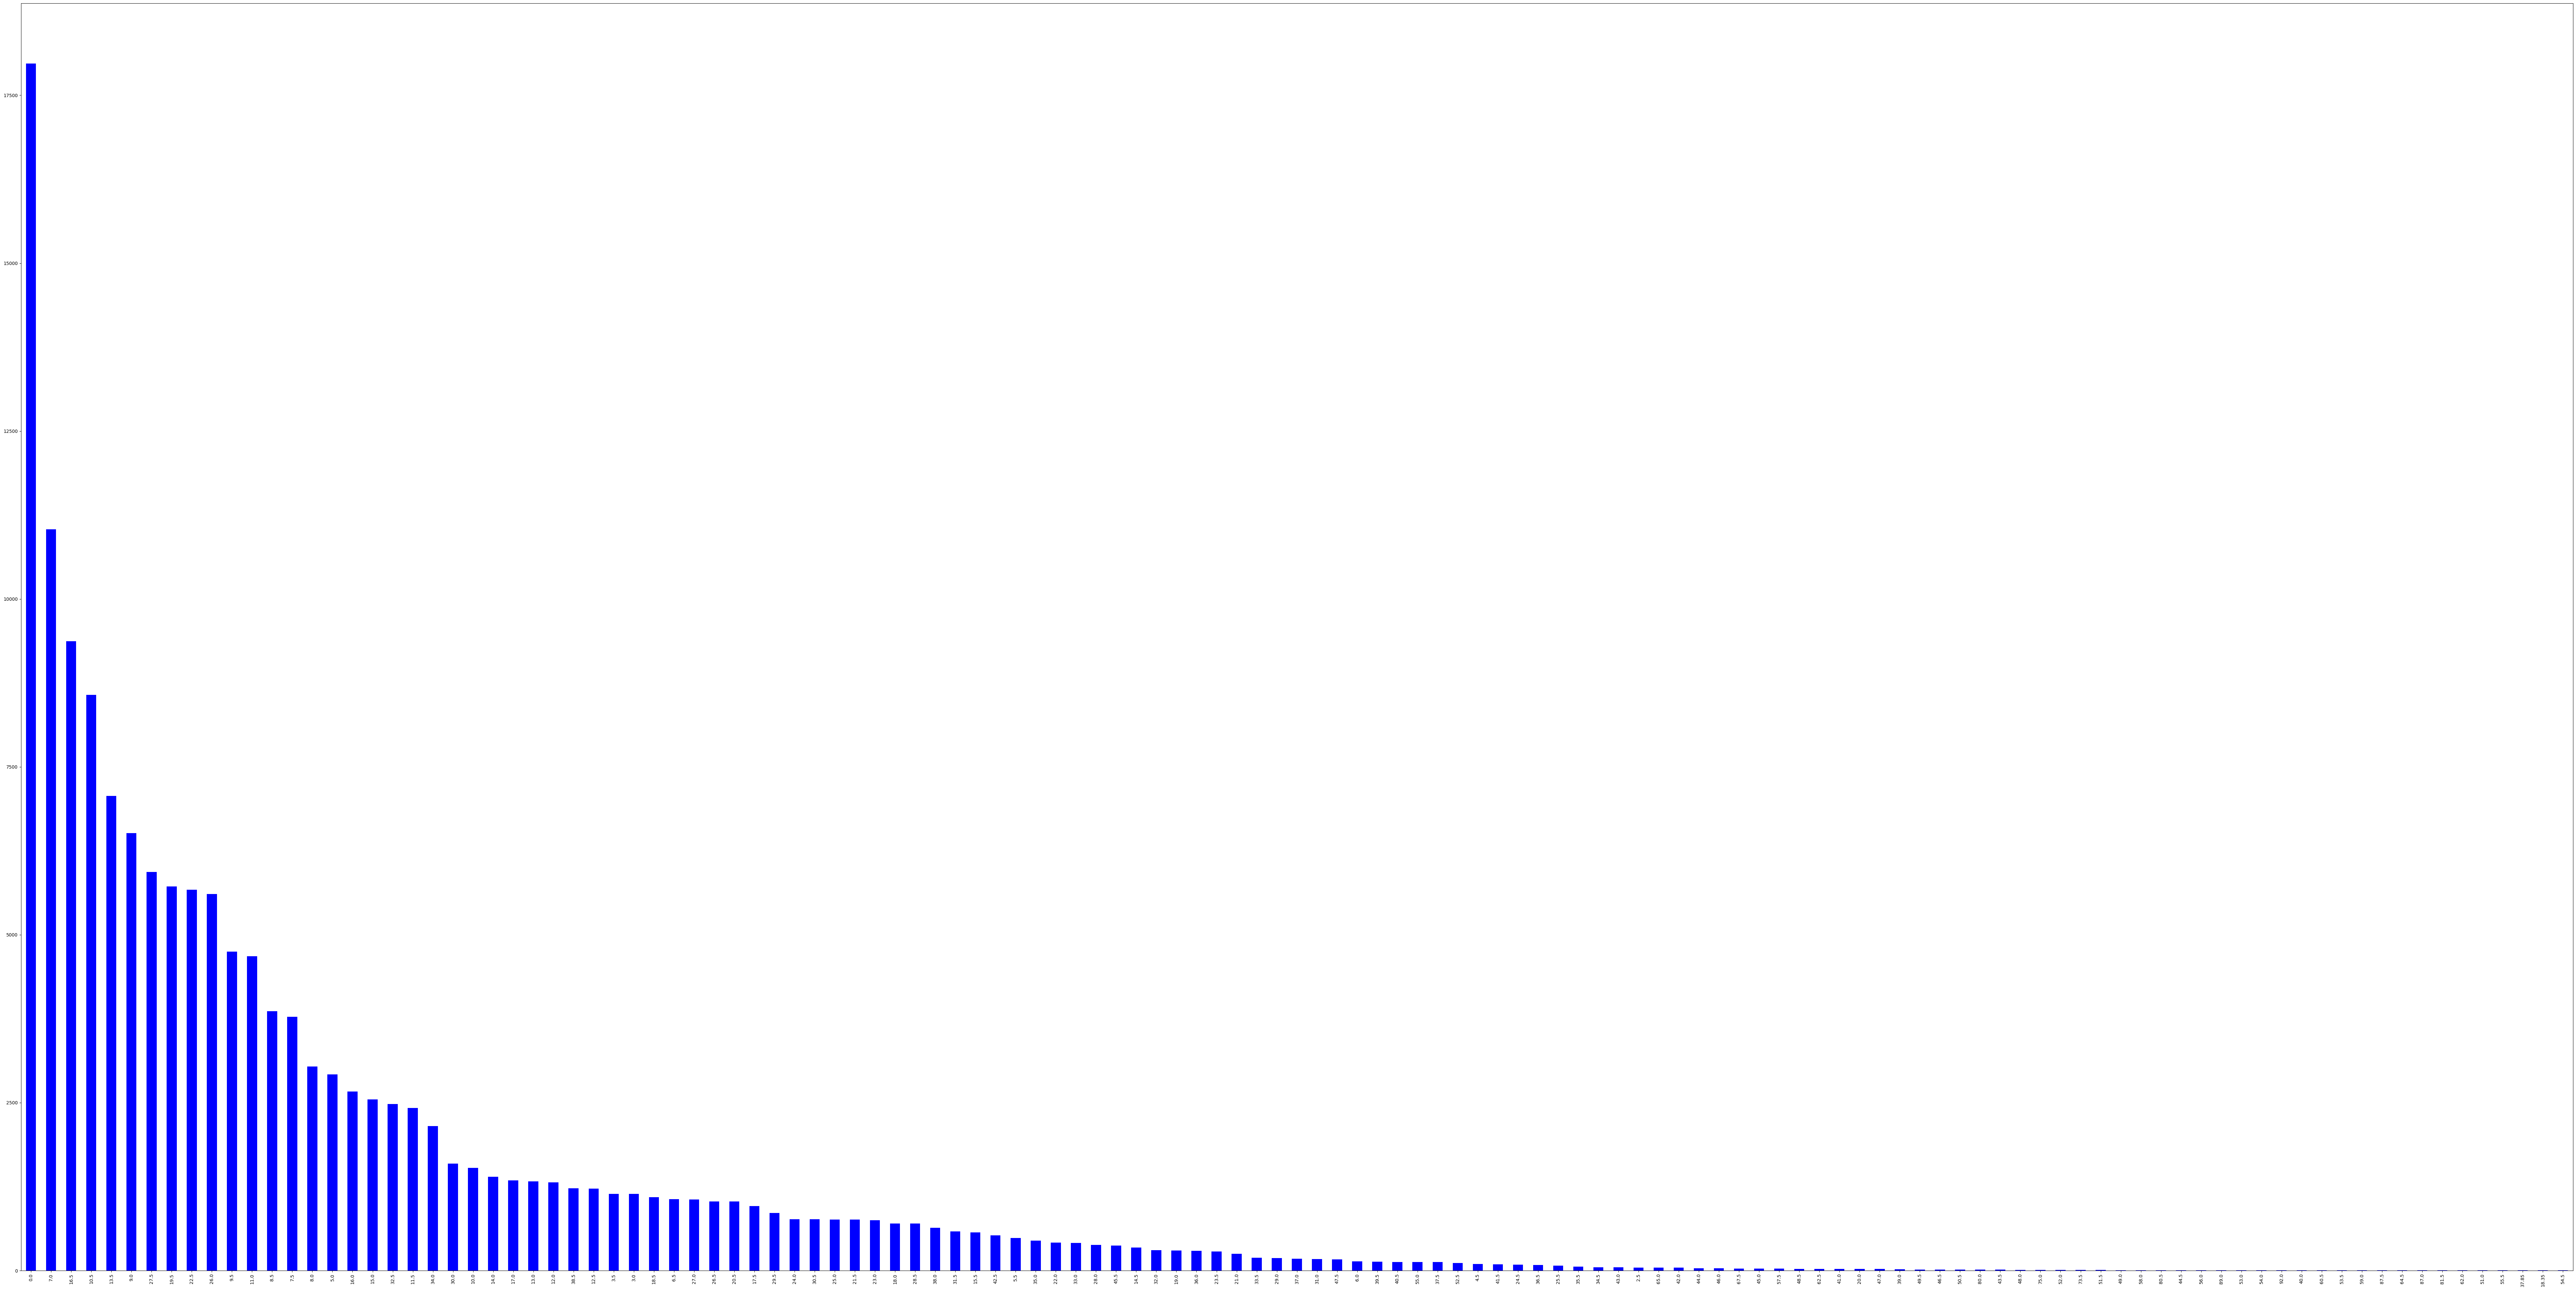

In [23]:
a['price'].value_counts().plot(kind = 'bar', figsize=(100,50),color = 'blue')

<Axes: >

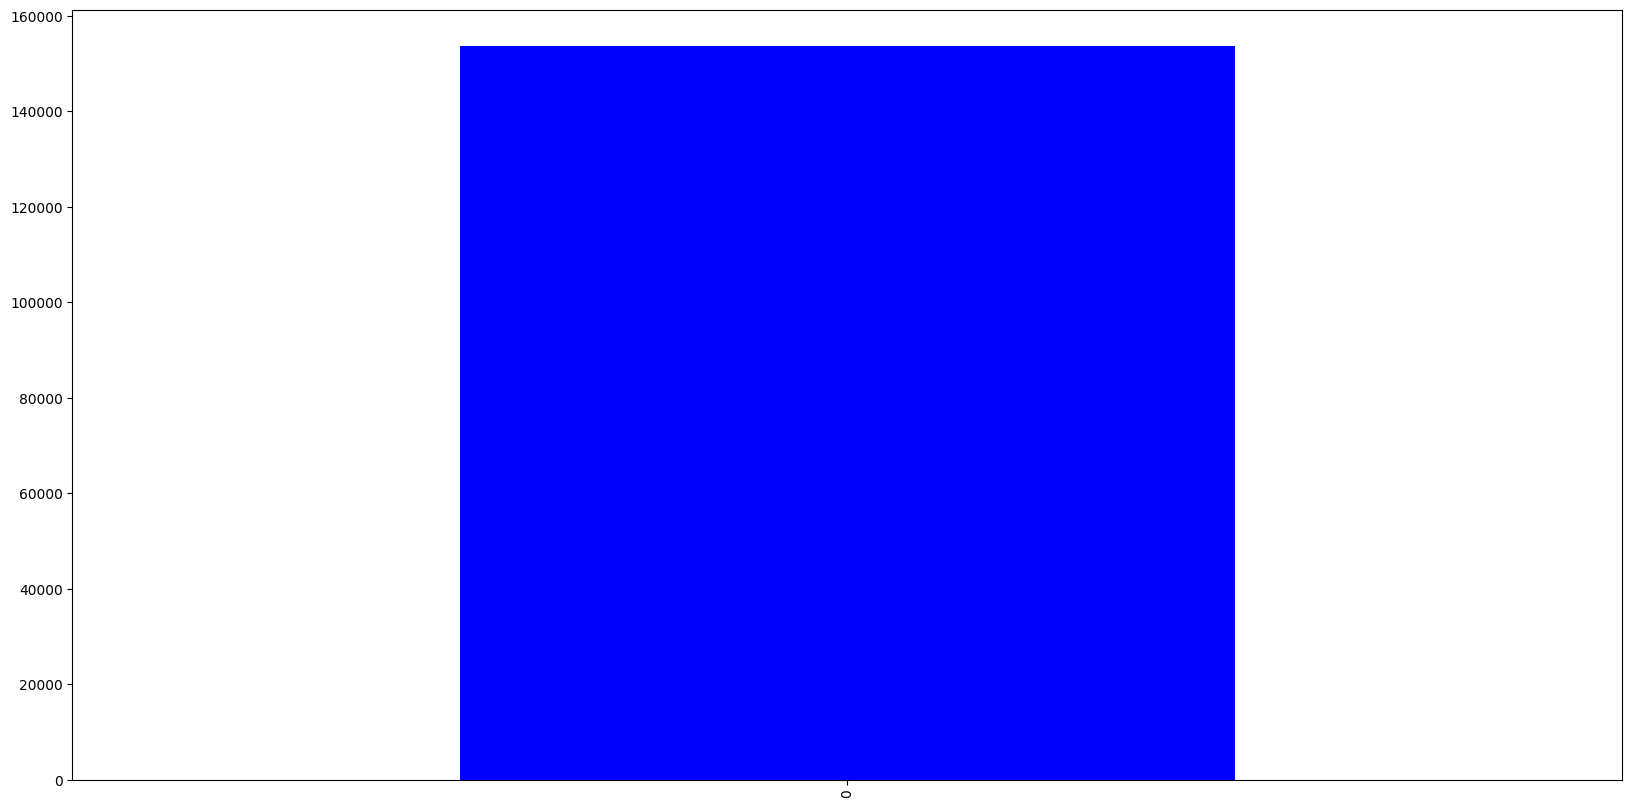

In [24]:
a['hour'].value_counts().plot(kind = 'bar', figsize=(20,10),color = 'blue')

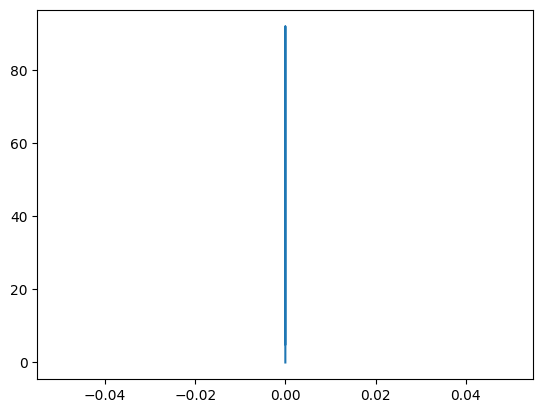

In [25]:
x = a['hour']
y = a['price']
plt.plot(x,y)
plt.show()

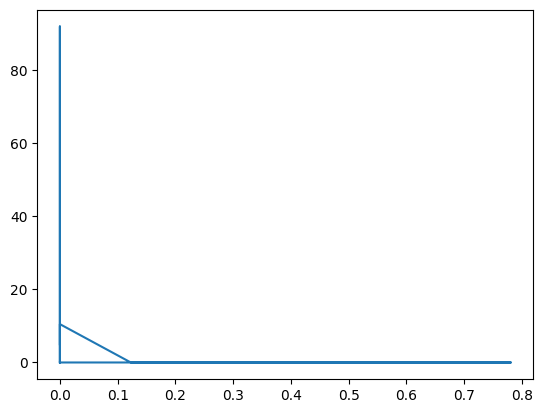

In [51]:
x = a['rain']
y = a['price']
plt.plot(x,y)
plt.show()

In [27]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [35]:
x1 = a[['distance','surge_multiplier', 'temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day','hour']]
y1 = a['price']


In [36]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(x1,y1,test_size=0.3,random_state = 42)

In [41]:
linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [42]:
predict = linear.predict(y_train)

In [44]:
df = pd.DataFrame({'Actual':y_test,'Predicted':predict})
df

,Actual,Predicted
94344,7.5,10.839390
109961,9.0,12.660955
120108,30.0,13.712845
86587,7.0,13.892436
133377,21.5,20.768204
...,...,...
13949,38.5,18.279587
62462,12.5,15.893592
134107,13.5,12.686611
144211,7.0,12.840546


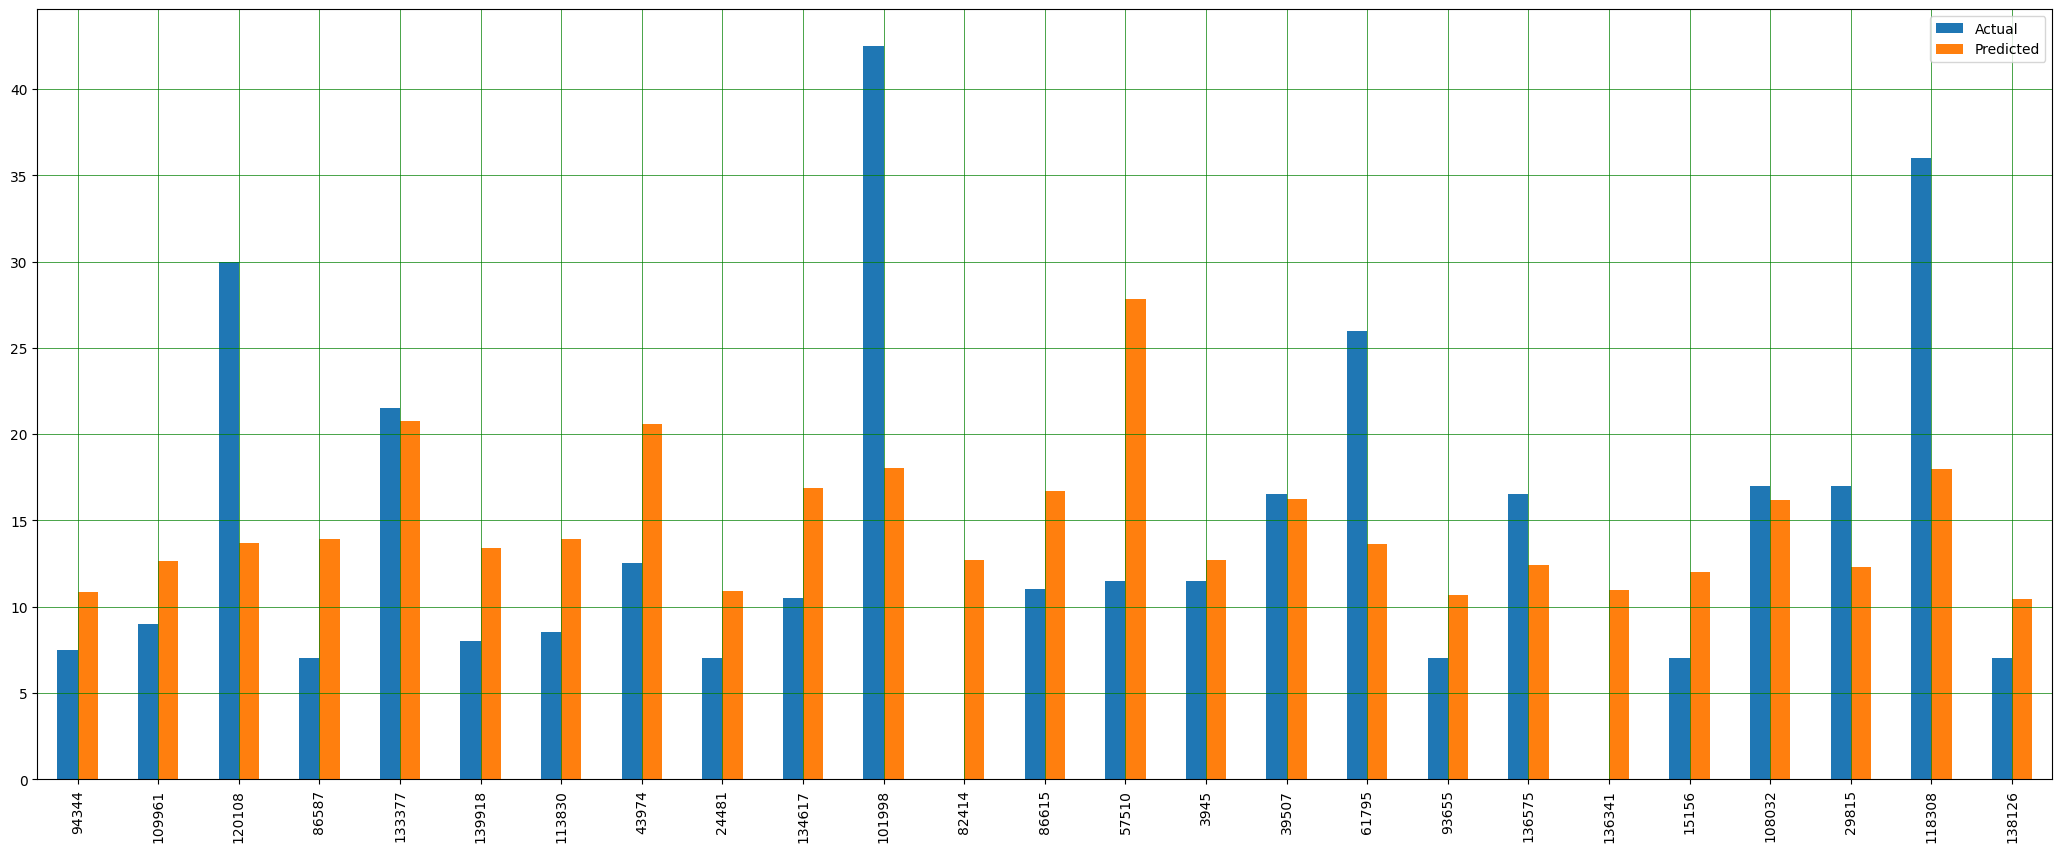

In [47]:
df1 = df.head(25)
df1.plot(kind = 'bar', figsize = (26,10))
plt.grid(which='major',linestyle = '-', linewidth = '0.5', color='green')
plt.grid(which='minor',linestyle = ':', linewidth = '0.5', color='black')
plt.show()